In [33]:
# Import beberapa library
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Untuk memvisualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
def convert_excel_to_csv(excel_file,csv_file):
  # Baca file Excel menggunakan pandas
  data_frame = pd.read_excel(excel_file)

  # Konversi data frame menjadi file CSV
  data_frame.to_csv(csv_file,index=False)
excel_file = "sample_data/data_mahasiswa.xlsx"
csv_file = "sample_data/data_mahasiswa.csv"
convert_excel_to_csv(excel_file,csv_file)

In [35]:
data = pd.read_csv('sample_data/data_mahasiswa.csv')

In [36]:
total_data = len(data)
print("Jumalh total data keseluruhannya : ",total_data)

Jumalh total data keseluruhannya :  277


In [37]:
data.head(10)

,No,NIM,NAMA,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,1.0,193303030001,Sallyana Yek,4.0,3.74,"3,55",3.90,4.00,lulus
1,2.0,193303030002,Anthony,4.0,3.74,"4,0",3.85,3.95,tidak lulus
2,3.0,193303030003,William Chandra,3.45,3.61,3.27,3.79,3.64,tidak lulus
3,4.0,193303030004,Valentino Damar,4.0,3.61,3.89,3.65,3.80,tidak lulus
4,5.0,193303030005,Nicholas Livando,4.0,3.74,3.94,3.80,3.77,tidak lulus
5,6.0,193303030006,Alvin Rasid,4.0,3.61,"4,0",3.90,4.00,tidak lulus
6,7.0,193303030009,Matthew Evan Phanie,"4,0",3.61,3.89,3.90,4.00,tidak lulus
7,8.0,193303030011,Michael,3.75,3.43,3.83,3.47,3.91,tidak lulus
8,9.0,193303030012,Windy Candra,3.5,3.74,3.9,3.70,4.00,tidak lulus
9,10.0,193303030014,Steven Lie,3.69,3.26,3.89,4.00,3.59,tidak lulus


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88 non-null     float64
 1   NIM               277 non-null    int64  
 2   NAMA              277 non-null    object 
 3   IPS (semester 1)  277 non-null    object 
 4   IPS (semester 2)  277 non-null    float64
 5   IPS (semester 3)  276 non-null    object 
 6   IPS (semester 4)  277 non-null    float64
 7   IPS (semester 5)  274 non-null    float64
 8   kelulusan         277 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 19.6+ KB


In [39]:
data.drop('No',axis=1,inplace=True)
data.drop('NAMA',axis=1,inplace=True)
data.drop('NIM',axis=1,inplace=True)

In [40]:
data.head(20)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.0,3.74,"3,55",3.90,4.00,lulus
1,4.0,3.74,"4,0",3.85,3.95,tidak lulus
2,3.45,3.61,3.27,3.79,3.64,tidak lulus
3,4.0,3.61,3.89,3.65,3.80,tidak lulus
4,4.0,3.74,3.94,3.80,3.77,tidak lulus
5,4.0,3.61,"4,0",3.90,4.00,tidak lulus
6,"4,0",3.61,3.89,3.90,4.00,tidak lulus
7,3.75,3.43,3.83,3.47,3.91,tidak lulus
8,3.5,3.74,3.9,3.70,4.00,tidak lulus
9,3.69,3.26,3.89,4.00,3.59,tidak lulus


In [41]:
data.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    1
IPS (semester 4)    0
IPS (semester 5)    3
kelulusan           0
dtype: int64

In [42]:
data_clean = data.dropna()

In [43]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
kelulusan           0
dtype: int64

In [44]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    object 
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    object 
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.9+ KB


In [46]:
# Mengecek apakah ada data yang duplicated
data_clean.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Length: 273, dtype: bool

In [47]:
# Mengubah data "Lulus" menjadi 1 dan "Tidak Lulus" menjadi 0
data_clean['kelulusan'] = data_clean['kelulusan'].map({'lulus': 1, 'tidak lulus': 0})

<ipython-input-47-ec98cc9a3842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['kelulusan'] = data_clean['kelulusan'].map({'lulus': 1, 'tidak lulus': 0})


In [48]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.0,3.74,"3,55",3.90,4.00,1
1,4.0,3.74,"4,0",3.85,3.95,0
2,3.45,3.61,3.27,3.79,3.64,0
3,4.0,3.61,3.89,3.65,3.80,0
4,4.0,3.74,3.94,3.80,3.77,0
5,4.0,3.61,"4,0",3.90,4.00,0
6,"4,0",3.61,3.89,3.90,4.00,0
7,3.75,3.43,3.83,3.47,3.91,0
8,3.5,3.74,3.9,3.70,4.00,0
9,3.69,3.26,3.89,4.00,3.59,0


In [49]:
data_clean = pd.DataFrame(data_clean)

In [50]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    object 
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    object 
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 14.9+ KB


In [51]:
# Mengkonversi data string ke float
data_clean['IPS (semester 1)'] = pd.to_numeric(data_clean['IPS (semester 1)'],errors='coerce')
data_clean['IPS (semester 3)'] = pd.to_numeric(data_clean['IPS (semester 3)'], errors='coerce')

In [52]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.00,3.74,NaN,3.90,4.00,1
1,4.00,3.74,NaN,3.85,3.95,0
2,3.45,3.61,3.27,3.79,3.64,0
3,4.00,3.61,3.89,3.65,3.80,0
4,4.00,3.74,3.94,3.80,3.77,0
5,4.00,3.61,NaN,3.90,4.00,0
6,NaN,3.61,3.89,3.90,4.00,0
7,3.75,3.43,3.83,3.47,3.91,0
8,3.50,3.74,3.90,3.70,4.00,0
9,3.69,3.26,3.89,4.00,3.59,0


In [54]:
data_clean.isna().sum()

IPS (semester 1)     1
IPS (semester 2)     0
IPS (semester 3)    40
IPS (semester 4)     0
IPS (semester 5)     0
kelulusan            0
dtype: int64

In [56]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan
0,4.00,3.74,4.00,3.90,4.00,1
1,4.00,3.74,4.00,3.85,3.95,0
2,3.45,3.61,3.27,3.79,3.64,0
3,4.00,3.61,3.89,3.65,3.80,0
4,4.00,3.74,3.94,3.80,3.77,0
5,4.00,3.61,4.00,3.90,4.00,0
6,4.00,3.61,3.89,3.90,4.00,0
7,3.75,3.43,3.83,3.47,3.91,0
8,3.50,3.74,3.90,3.70,4.00,0
9,3.69,3.26,3.89,4.00,3.59,0


In [57]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 276
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  273 non-null    float64
 1   IPS (semester 2)  273 non-null    float64
 2   IPS (semester 3)  273 non-null    float64
 3   IPS (semester 4)  273 non-null    float64
 4   IPS (semester 5)  273 non-null    float64
 5   kelulusan         273 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.9 KB


In [59]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
kelulusan           0
dtype: int64

# Membuat Model Dengan Algoritma SVM

In [61]:
# Data yang mau digunakan
X = data_clean[data_clean.columns[:5]]
print(X)

     IPS (semester 1)  IPS (semester 2)  IPS (semester 3)  IPS (semester 4)  \
0                4.00              3.74              4.00              3.90   
1                4.00              3.74              4.00              3.85   
2                3.45              3.61              3.27              3.79   
3                4.00              3.61              3.89              3.65   
4                4.00              3.74              3.94              3.80   
..                ...               ...               ...               ...   
272              3.09              3.47              3.63              2.82   
273              3.14              3.63              3.84              3.00   
274              3.52              4.00              4.00              3.73   
275              3.24              3.79              3.58              3.55   
276              4.00              4.00              3.84              3.55   

     IPS (semester 5)  
0                4.00  
1  

In [62]:
# Data target
y = data_clean['kelulusan']

In [63]:
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [64]:
# Membagi dataset traning 705 dan testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
# Melihat berapa data training
data_X_train = len(X_train)
data_y_train = len(y_train)
print("Jumlah Data training dari X_train = ",data_X_train)
print("Jumlah Data training dari y_train = ",data_y_train)

Jumlah Data training dari X_train =  191
Jumlah Data training dari y_train =  191


In [68]:
# Melihat berapa data testing
data_X_testing = len(X_test)
data_y_testing = len(y_test)
print("Jumlah data testing dari X_testing = ",data_X_testing)
print("Jumlah data testing dari y_testing = ",data_y_testing)

Jumlah data testing dari X_testing =  82
Jumlah data testing dari y_testing =  82


In [69]:
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
svm_model = SVC(kernel='linear')

In [70]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Membuat Model SVM dengan Data Testing

In [74]:
# Memprediksi Data Testing
svm_testing = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_testing)
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 96.34


In [75]:
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 96.34


In [78]:
# Menghitung persentase lulus dan tidak lulus
accuracy = accuracy_score(y_test, svm_testing)
percentage_lulus = (svm_testing.sum() / len(svm_testing)) * 100
percentage_tidak_lulus = 100 - percentage_lulus

In [79]:
print("Persentase Lulus: {:.2f}%".format(percentage_lulus))
print("Persentase Tidak Lulus: {:.2f}%".format(percentage_tidak_lulus))
print("Akurasi: {:.2f}%".format(accuracy * 100))

Persentase Lulus: 91.46%
Persentase Tidak Lulus: 8.54%
Akurasi: 96.34%


## Membuat Confusion Matriks pada data testing dengan algoritma SVM

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_testing)

In [81]:
print(cm)

[[ 7  3]
 [ 0 72]]


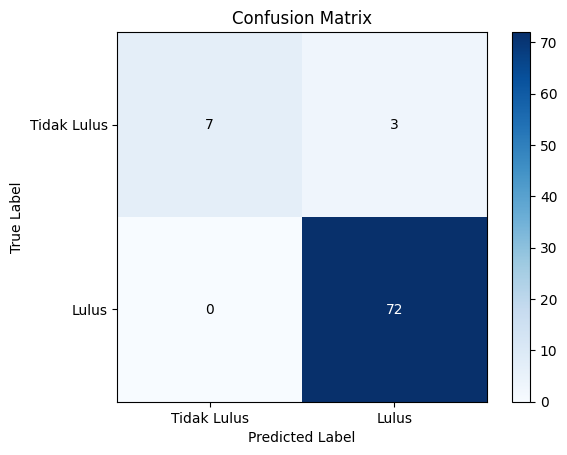

In [86]:
labels = ['Tidak Lulus', 'Lulus']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[0]),
       yticks=np.arange(cm.shape[1]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [92]:
# Menghitung metrics pada data
from sklearn.metrics import classification_report
report_data_testing = classification_report(y_test,svm_testing)

In [94]:
print("Berikut laporan metrics untuk data testing \n",report_data_testing)

Berikut laporan metrics untuk data testing 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.96      1.00      0.98        72

    accuracy                           0.96        82
   macro avg       0.98      0.85      0.90        82
weighted avg       0.96      0.96      0.96        82



# Membuat model SVM dengan data latih

In [95]:
svm_train = svm_model.predict(X_train)
svm_accuracy_train = accuracy_score(y_train, svm_train)
print('Accuracy SVM: %.2f' % (svm_accuracy_train*100))

Accuracy SVM: 93.19


In [97]:
# Menghitung persentase lulus dan tidak lulus di data latih
accuracy_train = accuracy_score(y_train, svm_train)
percentage_lulus = (svm_train.sum() / len(svm_train)) * 100
percentage_tidak_lulus = 100 - percentage_lulus

In [98]:
print("Persentase Lulus: {:.2f}%".format(percentage_lulus))
print("Persentase Tidak Lulus: {:.2f}%".format(percentage_tidak_lulus))
print("Akurasi: {:.2f}%".format(accuracy_train * 100))

Persentase Lulus: 90.05%
Persentase Tidak Lulus: 9.95%
Akurasi: 93.19%


## Membuat Confusion Matriks Dengan Data Latih Menggunakan Algoritma SVM

In [103]:
from sklearn.metrics import confusion_matrix
cm_data_latih = confusion_matrix(y_train, svm_train)
print(cm_data_latih)

[[ 17  11]
 [  2 161]]


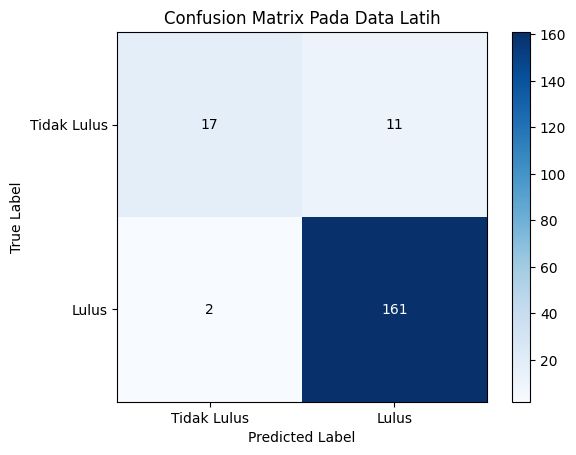

In [107]:
labels = ['Tidak Lulus', 'Lulus']
fig, ax = plt.subplots()
im = ax.imshow(cm_data_latih, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_data_latih.shape[0]),
       yticks=np.arange(cm_data_latih.shape[1]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Latih',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm_data_latih.max() / 2
for i in range(cm_data_latih.shape[0]):
    for j in range(cm_data_latih.shape[1]):
        ax.text(j, i, format(cm_data_latih[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_data_latih[i, j] > thresh else "black")

In [109]:
# Menghitung metrics pada data latih
from sklearn.metrics import classification_report
report_data_latih = classification_report(y_train,svm_train)

In [111]:
print("Berikut laporan metrics untuk data training \n",report_data_latih)

Berikut laporan metrics untuk data training 
               precision    recall  f1-score   support

           0       0.89      0.61      0.72        28
           1       0.94      0.99      0.96       163

    accuracy                           0.93       191
   macro avg       0.92      0.80      0.84       191
weighted avg       0.93      0.93      0.93       191

